In [4]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sounddevice as sd
from scipy.io import wavfile
from scipy import signal
from pydub import AudioSegment


c:\Users\Gleb\Desktop\psu studies\time_series\venv\Lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


C:\Users\Gleb\AppData\Local\Temp\ipykernel_1700\2559759019.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate_first, first = wavfile.read(path1)
C:\Users\Gleb\AppData\Local\Temp\ipykernel_1700\2559759019.py:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate_second, second = wavfile.read(path2)


Sampling Rate 1 and 2: 44100 44100
Audio Shape 1 and 2: (55296, 2) (163580, 2)



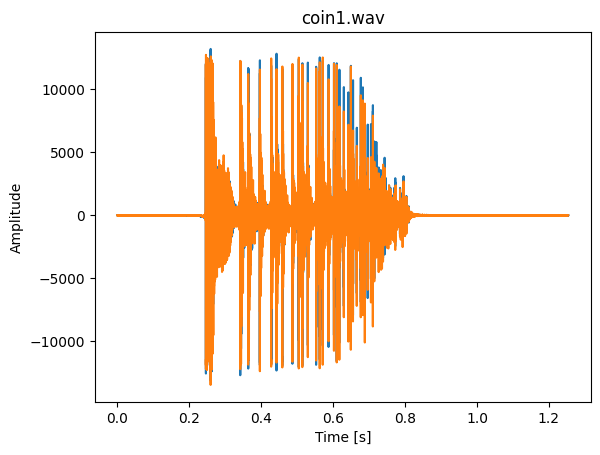

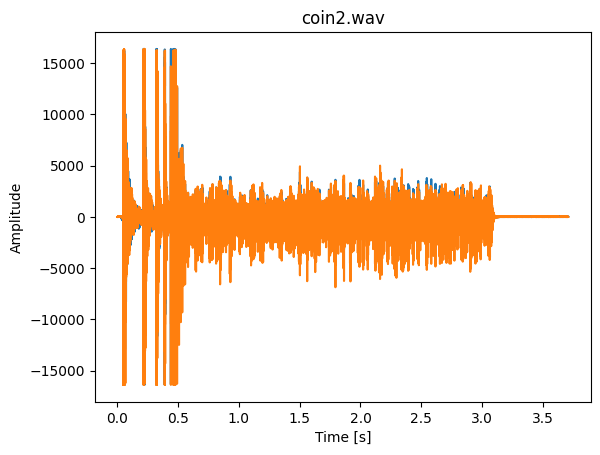

In [20]:
path1 = 'data/360739__matrixxx__coin-sound-01.wav'
path2 = 'data/360763__matrixxx__coin-sound-long-02.wav'
samplerate_first, first = wavfile.read(path1)
samplerate_second, second = wavfile.read(path2)
print('Sampling Rate 1 and 2:', samplerate_first, samplerate_second)
print('Audio Shape 1 and 2:', np.shape(first), np.shape(second))

print()

duration = len(first)/samplerate_first
time = np.arange(0,duration,1/samplerate_first) #time vector
plt.plot(time, first)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('coin1.wav')
plt.show()

print()

duration = len(second) / samplerate_second
time = np.arange(0, duration, 1 / samplerate_second)

plt.plot(time, second)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('coin2.wav')
plt.show()


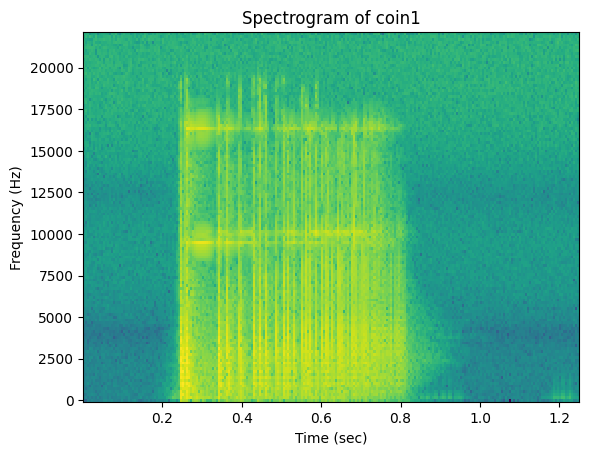

In [24]:
# спектрограмма
adata = first[:, 0]
s = samplerate_first

fr, tm, spgram = signal.spectrogram(adata,s)
lspg = np.log(spgram)
plt.pcolormesh(tm,fr,lspg,shading='auto')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')
plt.title('Spectrogram of coin1')
plt.show()

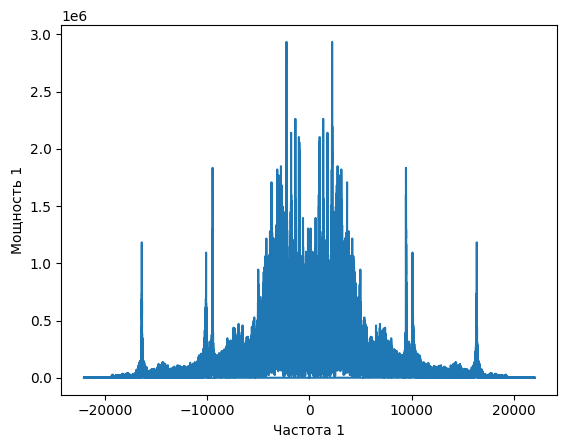

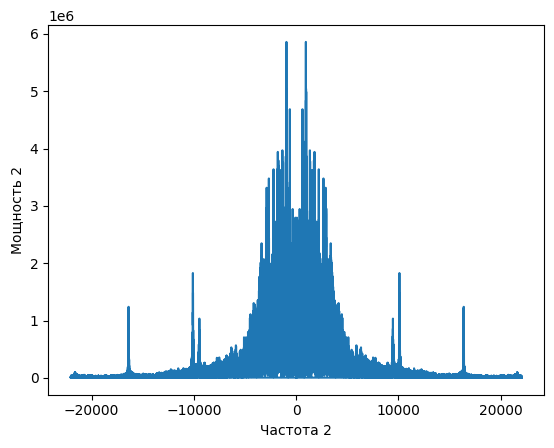

In [32]:
from scipy.fft import fft, fftfreq

duration = len(first)/samplerate_first
# число точек в normalized_tone
N = int(samplerate_first * duration)

yf = fft(first[:, 0])
xf = fftfreq(N, 1 / samplerate_first)

plt.plot(xf, np.abs(yf))
plt.xlabel('Частота 1')
plt.ylabel('Мощность 1')
plt.show()


duration = len(second)/samplerate_second
# число точек в normalized_tone
N = int(samplerate_second * duration)

yf = fft(second[:, 0])
xf = fftfreq(N, 1 / samplerate_second)

plt.plot(xf, np.abs(yf))
plt.xlabel('Частота 2')
plt.ylabel('Мощность 2')
plt.show()

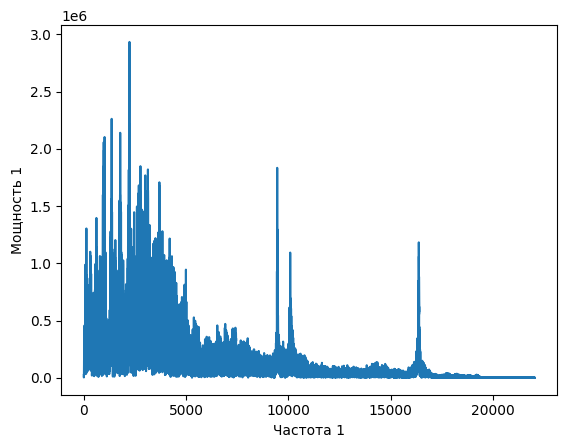

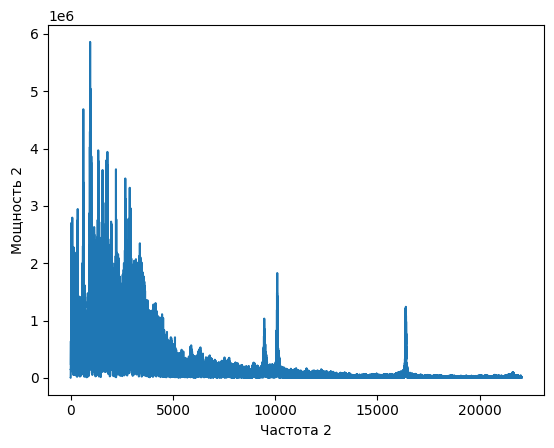

In [33]:
from scipy.fft import rfft, rfftfreq

duration = len(first)/samplerate_first

# число точек в normalized_tone
rN = int(samplerate_first * duration)

ryf = rfft(first[:, 0])
rxf = rfftfreq(rN, 1 / samplerate_first)

plt.plot(rxf, np.abs(ryf))
plt.xlabel('Частота 1')
plt.ylabel('Мощность 1')
plt.show()

duration = len(second)/samplerate_second

rN = int(samplerate_second * duration)

ryf = rfft(second[:, 0])
rxf = rfftfreq(rN, 1 / samplerate_second)

plt.plot(rxf, np.abs(ryf))
plt.xlabel('Частота 2')
plt.ylabel('Мощность 2')
plt.show()

In [114]:
# Максимальная частота составляет половину частоты дискретизации
points_per_freq = len(rxf) / (samplerate / 2)

# Наша целевая частота 
target_idx = int(points_per_freq * 4998.663426488456)

target_idx1 = int(points_per_freq * 10000)

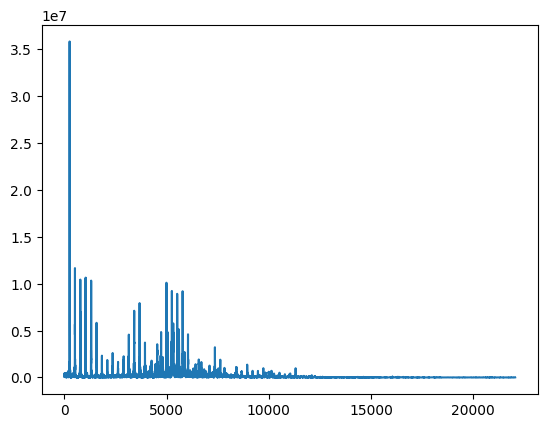

In [115]:
ryf[target_idx-2:target_idx+2] = 0


plt.plot(rxf, np.abs(ryf))
plt.show()

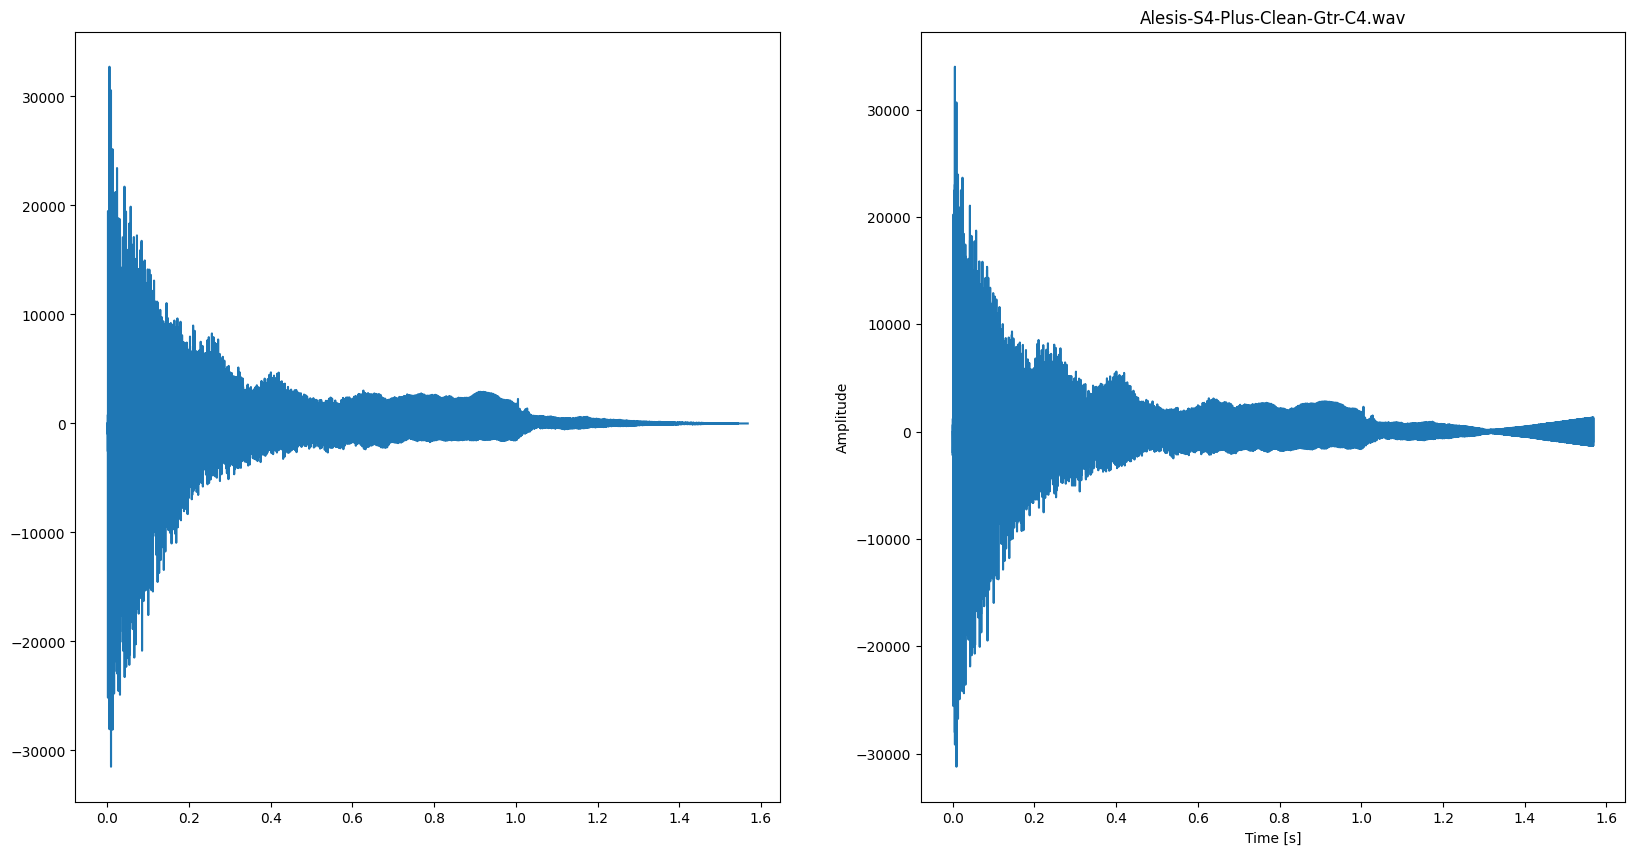

In [116]:
from scipy.fft import irfft

new_sig = irfft(ryf)

fig, ax = plt.subplots(nrows= 1 , ncols= 2, figsize=(20, 10) )

ax[0].plot(time, data[:, 0])
ax[1].plot(time, new_sig)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Alesis-S4-Plus-Clean-Gtr-C4.wav')
plt.show()

In [38]:
import librosa

samples1, sample_rate1 = librosa.load("data/360739__matrixxx__coin-sound-01.wav")

y1 = samples1
sr1 = sample_rate1
mfccs1 = librosa.feature.mfcc(y=y1, sr=sr1, n_mfcc=10)

samples2, sample_rate2 = librosa.load("data/360763__matrixxx__coin-sound-long-02.wav")

y2 = samples2
sr2 = sample_rate2
mfccs2 = librosa.feature.mfcc(y=y2, sr=sr2, n_mfcc=10)


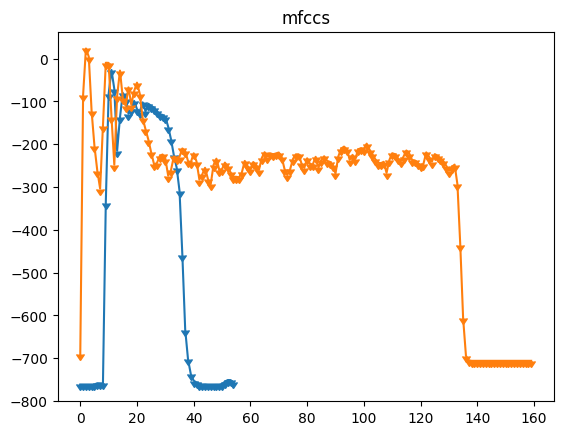

In [42]:
s1 = mfccs1[0:1,:][0,:]
t1 = [*range(len(s1))]
s2 = mfccs2[0:1,:][0,:]
t2 = [*range(len(s2))]
plt.plot(t1,  s1.reshape(55,1),marker=matplotlib.markers.CARETDOWNBASE)
plt.plot(t2,  s2.reshape(160,1),marker=matplotlib.markers.CARETDOWNBASE)
plt.title('mfccs')
plt.show()

In [46]:
from spafe.features.gfcc import gfcc

In [47]:
gfccs1 = gfcc(y1, fs=sr1, num_ceps=1)
gfccs2 = gfcc(y2, fs=sr2, num_ceps=1)  

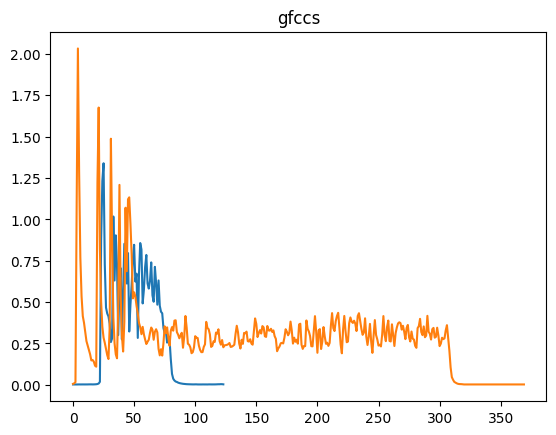

In [48]:
plt.plot(gfccs1)
plt.plot(gfccs2)
plt.title('gfccs')
plt.show()